# **Clasificación y Clustering**

## 1. Importamos e instalamos librerias

> También declararemos algunas variables globales para su uso en todo el notebook.

In [35]:
#!pip install sweetviz
#!pip install pandas-profiling
#!pip install imbalanced-learn

import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
import plotly.express as px

# Importamos algunas librerías para análisis de datos
import sweetviz as sv

from sklearn.tree import DecisionTreeClassifier
from sklearn import cluster
from sklearn import preprocessing
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Ignoraremos los Warnings para hacer el cuaderno un poco más amigable al usuario.
import warnings
#warnings.filterwarnings("ignore")

> Aquí definimos la función para tratar los datos de clasificación

In [15]:
def handle_non_numerical_data(df):
    
    # handling non-numerical data: must convert.
    columns = df.columns.values

    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        #print(column,df[column].dtype)
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            
            column_contents = df[column].values.tolist()
            #finding just the uniques
            unique_elements = set(column_contents)
            # great, found them. 
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    # creating dict that contains new
                    # id per unique string
                    text_digit_vals[unique] = x
                    x+=1
            # now we map the new "id" vlaue
            # to replace the string. 
            df[column] = list(map(convert_to_int,df[column]))

    return df

## 2. Descargamos los datos

In [16]:
df_atp_matches_2000 = pd.read_csv('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2000.csv')
df_atp_matches_2001 = pd.read_csv('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2001.csv')
df_atp_matches_2002 = pd.read_csv('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2002.csv')
df_atp_matches_2003 = pd.read_csv('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2003.csv')
df_atp_matches_2004 = pd.read_csv('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2004.csv')
df_atp_matches_2005 = pd.read_csv('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2005.csv')
df_atp_matches_2006 = pd.read_csv('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2006.csv')
df_atp_matches_2007 = pd.read_csv('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2007.csv')
df_atp_matches_2008 = pd.read_csv('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2008.csv')
df_atp_matches_2009 = pd.read_csv('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2009.csv')
df_atp_matches_2010 = pd.read_csv('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2010.csv')
df_atp_matches_2011 = pd.read_csv('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2011.csv')
df_atp_matches_2012 = pd.read_csv('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2012.csv')
df_atp_matches_2013 = pd.read_csv('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2013.csv')
df_atp_matches_2014 = pd.read_csv('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2014.csv')
df_atp_matches_2015 = pd.read_csv('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2015.csv')
df_atp_matches_2016 = pd.read_csv('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2016.csv')
df_atp_matches_2017 = pd.read_csv('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2017.csv')
df_atp_matches_2017 = pd.read_csv('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2017.csv')
df_atp_matches_2018 = pd.read_csv('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2018.csv')
df_atp_matches_2019 = pd.read_csv('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2019.csv')
df_atp_matches_2020 = pd.read_csv('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2020.csv')

In [17]:
frame = [df_atp_matches_2000, df_atp_matches_2001, df_atp_matches_2002, df_atp_matches_2003, df_atp_matches_2004, df_atp_matches_2005, df_atp_matches_2006, df_atp_matches_2007, df_atp_matches_2008, df_atp_matches_2009, df_atp_matches_2010, df_atp_matches_2011, df_atp_matches_2012, df_atp_matches_2013, df_atp_matches_2014, df_atp_matches_2015, df_atp_matches_2016, df_atp_matches_2017, df_atp_matches_2017, df_atp_matches_2018, df_atp_matches_2019, df_atp_matches_2020]
df = pd.concat(frame, ignore_index = True) # definimos ignore index false para que 

pd.set_option('display.max_columns', None)

print('=================================================================')
print(df.info())
#print(df.head())
#print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66069 entries, 0 to 66068
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tourney_id          66069 non-null  object 
 1   tourney_name        66069 non-null  object 
 2   surface             66069 non-null  object 
 3   draw_size           66069 non-null  int64  
 4   tourney_level       66069 non-null  object 
 5   tourney_date        66069 non-null  int64  
 6   match_num           66069 non-null  int64  
 7   winner_id           66069 non-null  int64  
 8   winner_seed         27428 non-null  float64
 9   winner_entry        8114 non-null   object 
 10  winner_name         66069 non-null  object 
 11  winner_hand         66061 non-null  object 
 12  winner_ht           63613 non-null  float64
 13  winner_ioc          66069 non-null  object 
 14  winner_age          66066 non-null  float64
 15  loser_id            66069 non-null  int64  
 16  lose

## 3. Limpieza de Datos

> Realizamos la limpieza de algunos datos, realizamos algunas transformaciones en algunas variables categóricas.

In [18]:
df_clustering = df.copy()
round_replace = {'R128': 128,
                  'R64': 64,
                  'R32': 32,
                  'R16': 16,
                  'QF': 4,
                  'SF': 2,
                  'F': 1
}

# Eliminamos las Round Robin (RR y ER)
df_clustering['round'].replace(round_replace, inplace = True)
df_clustering

df_pca = df.copy()
df_pca['round'].replace(round_replace, inplace = True)

In [19]:
accident_type_replace = {}
for index,accident_type in enumerate(df.tourney_name.unique()):
    if not pd.isna(accident_type): accident_type_replace[accident_type] = int(index)
    
df_clustering['tourney_name'].replace(accident_type_replace, inplace = True)
df_clustering

df_pca['tourney_name'].replace(accident_type_replace, inplace = True)
df_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66069 entries, 0 to 66068
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tourney_id          66069 non-null  object 
 1   tourney_name        66069 non-null  int64  
 2   surface             66069 non-null  object 
 3   draw_size           66069 non-null  int64  
 4   tourney_level       66069 non-null  object 
 5   tourney_date        66069 non-null  int64  
 6   match_num           66069 non-null  int64  
 7   winner_id           66069 non-null  int64  
 8   winner_seed         27428 non-null  float64
 9   winner_entry        8114 non-null   object 
 10  winner_name         66069 non-null  object 
 11  winner_hand         66061 non-null  object 
 12  winner_ht           63613 non-null  float64
 13  winner_ioc          66069 non-null  object 
 14  winner_age          66066 non-null  float64
 15  loser_id            66069 non-null  int64  
 16  lose

In [20]:
COLUMNS_TO_GET = [
                  "surface",
                  "minutes",
                  "winner_ht", "loser_ht",
                  "w_ace", "l_ace",
                  "w_svpt", "l_svpt", # service points
                  "w_1stWon", "l_1stWon",
                  "w_2ndWon", "l_2ndWon",
                  "w_bpSaved", "l_bpSaved",
                  "w_bpFaced", "l_bpFaced",
                  "w_SvGms", "l_SvGms", # service games won
                  "winner_rank_points", "loser_rank_points",
                  "round",
                 ]
# Parámetros de los winners y losers con los que se realizan cálculos y se debn hacer drop.
UNNECESSARY_ATTR = ['tourney_id', 'tourney_name', 'winner_name', 'loser_name', 'winner_entry', 'winner_seed', 'loser_entry', 'loser_seed','tourney_date', 'winner_id', 'loser_id', 'score']

WL_DROP = ['w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_SvGms', 'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms']

In [21]:
#df_clustering = df_clustering.loc[:, df.columns.isin(COLUMNS_TO_GET)]

df_clustering = df_clustering[df_clustering['round'] != 'RR']
df_clustering = df_clustering[df_clustering['round'] != 'ER']

df_clustering = df_clustering.drop(UNNECESSARY_ATTR, axis = 1) 
df_clustering = df_clustering.dropna()
df_clustering = df_clustering.drop_duplicates()

# Crearemos dos formulas para calculos del ganador y el perdedor para evitar la correlación de estas variables, tambien haremos un drop de estas variables.
df_clustering['w_calculation'] = df_clustering['w_svpt'] + df_clustering['w_1stIn'] + df_clustering['w_1stWon'] + df_clustering['w_2ndWon'] + df_clustering['w_SvGms']
df_clustering['l_calculation'] = df_clustering['l_svpt'] + df_clustering['l_1stIn'] + df_clustering['l_1stWon'] + df_clustering['l_2ndWon'] + df_clustering['l_SvGms']
df_clustering = df_clustering.drop(WL_DROP, axis = 1)

df_clustering = handle_non_numerical_data(df_clustering)

# Eliminamos los outlier para minutes
df_clustering = df_clustering[df_clustering['minutes'] < 400]

Counter(df_clustering['surface'])

Counter({1: 28038, 0: 16859, 2: 5617, 3: 1402})

In [22]:
df_clustering

,surface,draw_size,tourney_level,match_num,winner_hand,winner_ht,winner_ioc,winner_age,loser_hand,loser_ht,loser_ioc,loser_age,best_of,round,minutes,w_ace,w_df,w_bpSaved,w_bpFaced,l_ace,l_df,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,w_calculation,l_calculation
0,1,32,3,1,1,188.0,39,21.771389,1,180.0,58,31.137577,3,0,108.0,18.0,4.0,3.0,5.0,7.0,8.0,4.0,7.0,11.0,1612.0,63.0,595.0,229.0,246.0
1,1,32,3,2,1,190.0,66,24.558522,1,183.0,37,24.386037,3,0,85.0,5.0,3.0,5.0,6.0,5.0,10.0,3.0,6.0,211.0,157.0,49.0,723.0,192.0,161.0
2,1,32,3,3,1,175.0,66,21.390828,2,173.0,74,26.535250,3,0,56.0,0.0,0.0,1.0,1.0,0.0,6.0,7.0,11.0,48.0,726.0,59.0,649.0,135.0,124.0
3,1,32,3,4,1,183.0,66,19.909651,2,185.0,29,18.422998,3,0,68.0,5.0,1.0,0.0,0.0,11.0,2.0,6.0,8.0,45.0,768.0,61.0,616.0,132.0,166.0
4,1,32,3,5,1,180.0,12,27.381246,2,185.0,59,23.770021,3,0,115.0,1.0,2.0,6.0,11.0,8.0,8.0,5.0,9.0,167.0,219.0,34.0,873.0,230.0,202.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66063,1,32,3,124,1,188.0,12,22.746064,2,180.0,12,30.305270,3,0,81.0,4.0,0.0,2.0,3.0,4.0,3.0,3.0,6.0,63.0,950.0,25.0,1785.0,148.0,191.0
66064,1,32,3,125,1,175.0,57,30.409309,2,185.0,67,27.843943,3,0,115.0,9.0,2.0,1.0,3.0,4.0,1.0,3.0,7.0,35.0,1384.0,79.0,802.0,180.0,178.0
66066,1,32,3,128,1,193.0,12,22.976044,2,211.0,58,23.143053,3,0,67.0,10.0,1.0,0.0,0.0,19.0,3.0,3.0,5.0,28.0,1670.0,33.0,1402.0,158.0,139.0
66067,1,32,3,129,1,193.0,47,23.649555,1,178.0,59,21.503080,3,0,84.0,7.0,2.0,1.0,2.0,0.0,2.0,7.0,11.0,90.0,748.0,74.0,838.0,131.0,151.0


## 4. Resampling
> Vamos a realizar un undersampling de la variable categorica a predecir **surface** vamos a reducir las muestras a la categoría minoritaria.

In [23]:
# Podemos observar que hay un desbalanceo en las varaibles a predecir.
print(Counter(df_clustering['surface']))

Counter({1: 28038, 0: 16859, 2: 5617, 3: 1402})


In [24]:
df_clustering.head()

X = df_clustering.drop('surface', axis=1)
y = df_clustering['surface']

print(Counter(y))

# Hacemos undersampling a la categoría con menor cantidad de datos.
undersample = RandomUnderSampler(sampling_strategy='not minority')

X_over, y_over = undersample.fit_resample(X, y)
print(Counter(y_over))

df_clustering = pd.concat([X_over, y_over], axis=1)
print(df_clustering.head())

Counter({1: 28038, 0: 16859, 2: 5617, 3: 1402})
Counter({0: 1402, 1: 1402, 2: 1402, 3: 1402})
   draw_size  tourney_level  match_num  winner_hand  winner_ht  winner_ioc  \
0         32              3         21            1      178.0          25   
1         64              2         32            1      193.0           9   
2         32              3         15            1      180.0          66   
3         32              3         29            1      188.0          12   
4         56              3         12            1      178.0          41   

   winner_age  loser_hand  loser_ht  loser_ioc  loser_age  best_of  round  \
0   29.894593           2     188.0         11  25.062286        3      7   
1   21.749487           2     188.0         11  28.114990        3      3   
2   26.543463           2     190.0         36  26.050650        3      0   
3   22.633812           1     183.0         28  23.906913        3      2   
4   21.300479           2     183.0         74  23.0

In [25]:
atp_report = sv.analyze(df_clustering)
atp_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## 5. Clasificación y Clustering

### 5.0 Principal Components Analysis **(PCA)** y KMeans

> Realizaremos un análisis de componentes principales y los graficaremos para ver si es posible ver algún patrón en los datos, esto se realizará previamente a la aplicación de técnicas de clustering.

In [96]:
# Graficaremos PCA con 3 componentes
scaler = StandardScaler()
df_clustering_pca = df_clustering.copy()#scaler.fit_transform(df_clustering)
X = df_clustering_pca#.drop('minutes', axis = 1).copy()
y = df_clustering_pca['minutes'].copy()#_std['surface'].copy()

pca = PCA(n_components = 3) 
components = pca.fit_transform(X)#,y)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, color=y, z=2,
    title=f'Varianza Total Explicada: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [86]:
wcss = []
for i in range(1, 21):
    kmeans_pca = cluster.KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(components)
    wcss.append(kmeans_pca.inertia_)

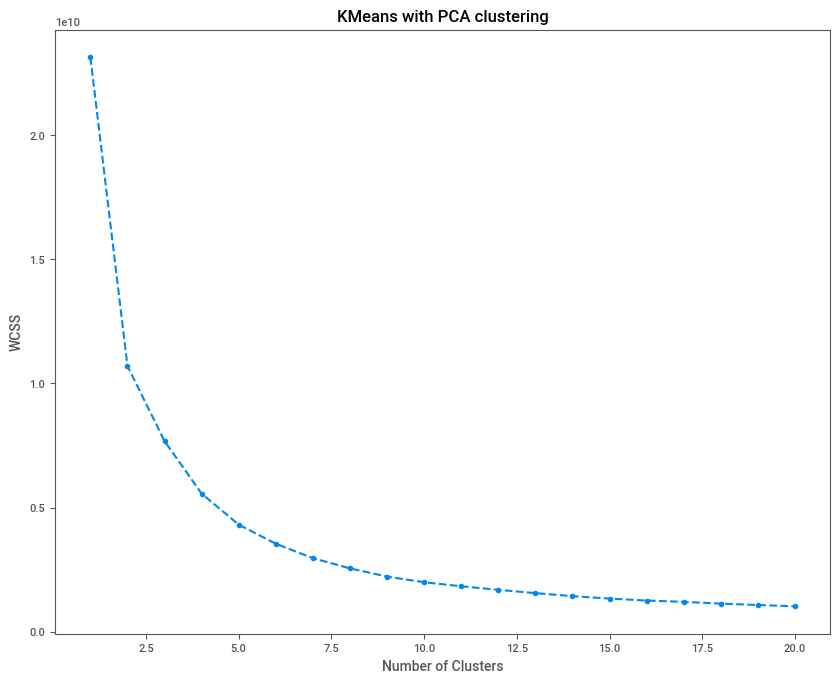

In [87]:
plt.figure(figsize = (10, 8))
plt.plot(range(1,21), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('KMeans with PCA clustering')
plt.show()

In [90]:
kmeans_pca = cluster.KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
kmeans_pca.fit(components)

KMeans(n_clusters=4, random_state=42)

In [91]:
df_pca_kmeans = pd.concat([df_clustering_pca.reset_index(drop = True), pd.DataFrame(components)], axis = 1)
df_pca_kmeans.columns.values[-3: ] = ['Componente 1', 'Componente 2', 'Componente 3']
df_pca_kmeans['ATP KMeans PCA'] = kmeans_pca.labels_

In [97]:
df_pca_kmeans

,draw_size,tourney_level,match_num,winner_hand,winner_ht,winner_ioc,winner_age,loser_hand,loser_ht,loser_ioc,loser_age,best_of,round,minutes,w_ace,w_df,w_bpSaved,w_bpFaced,l_ace,l_df,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,w_calculation,l_calculation,Componente 1,Componente 2,Componente 3,ATP KMeans PCA,clase
0,32,3,21,1,178.0,25,29.894593,2,188.0,11,25.062286,3,7,147.0,1.0,3.0,11.0,15.0,2.0,1.0,5.0,9.0,40.0,1060.0,94.0,539.0,293.0,224.0,0,-480.829717,-334.511964,0,Primero
1,64,2,32,1,193.0,9,21.749487,2,188.0,11,28.114990,3,3,53.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,3.0,54.0,700.0,24.0,1270.0,64.0,87.0,0,-743.838641,436.011943,0,Primero
2,32,3,15,1,180.0,66,26.543463,2,190.0,36,26.050650,3,0,140.0,3.0,4.0,8.0,12.0,6.0,1.0,3.0,8.0,105.0,380.0,60.0,665.0,263.0,243.0,0,-1139.624064,-120.785024,0,Primero
3,32,3,29,1,188.0,12,22.633812,1,183.0,28,23.906913,3,2,65.0,7.0,3.0,0.0,2.0,2.0,2.0,3.0,8.0,4.0,3340.0,40.0,895.0,134.0,115.0,0,1826.069799,-275.728865,2,Tercero
4,56,3,12,1,178.0,41,21.300479,2,183.0,74,23.028063,3,3,37.0,0.0,1.0,2.0,3.0,0.0,1.0,1.0,4.0,48.0,962.0,76.0,676.0,56.0,53.0,0,-560.973165,-189.073345,0,Primero
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5603,32,3,27,1,188.0,15,23.509925,2,183.0,74,28.687201,3,4,73.0,15.0,1.0,0.0,1.0,4.0,0.0,3.0,7.0,14.0,1485.0,63.0,655.0,137.0,154.0,3,-44.211512,-275.040169,0,Primero
5604,32,3,28,1,185.0,15,26.833676,2,178.0,40,24.605065,3,4,76.0,9.0,2.0,3.0,4.0,0.0,1.0,6.0,10.0,56.0,704.0,58.0,693.0,141.0,145.0,3,-814.282456,-136.491790,0,Primero
5605,32,3,29,1,193.0,9,24.183436,2,183.0,59,23.813826,3,2,159.0,8.0,2.0,3.0,5.0,9.0,1.0,3.0,7.0,27.0,1115.0,10.0,1690.0,206.0,184.0,3,-277.653696,801.359774,0,Primero
5606,32,3,30,1,185.0,15,26.833676,2,188.0,59,23.509925,3,2,105.0,7.0,3.0,3.0,4.0,14.0,1.0,4.0,6.0,56.0,704.0,14.0,1485.0,197.0,190.0,3,-712.029306,650.826770,0,Primero


In [93]:
df_pca_kmeans['clase'] = df_pca_kmeans['ATP KMeans PCA'].map({0: 'Primero',
                                                                 1: 'Segundo',
                                                                 2: 'Tercero',
                                                                 3: 'Cuarto'})


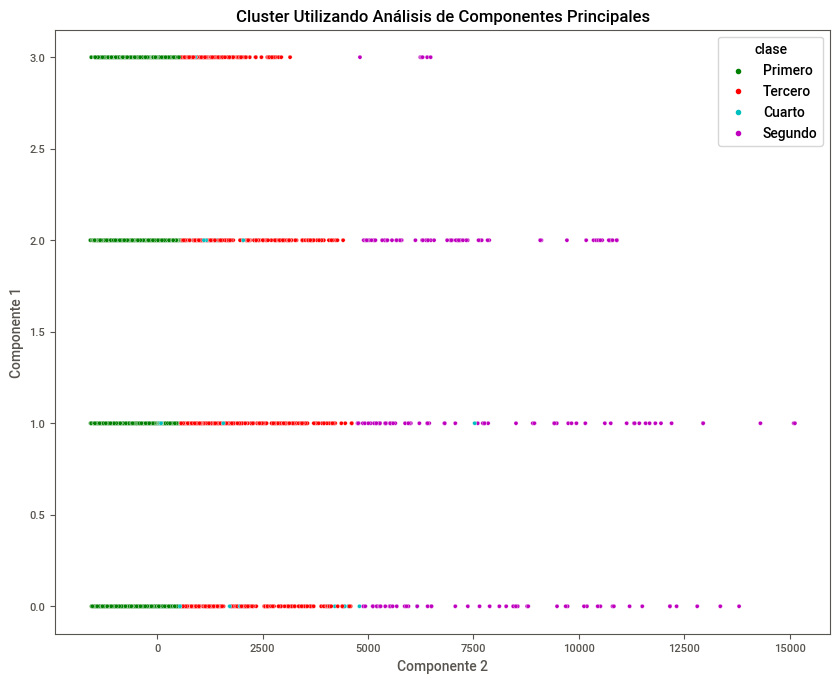

In [94]:
x_axis = df_pca_kmeans['Componente 2']
y_axis = df_pca_kmeans['Componente 1']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_pca_kmeans['clase'], palette = ['g', 'r', 'c', 'm'])
plt.title('Cluster Utilizando Análisis de Componentes Principales')
plt.show()

> Podemos observar que aplicando el análisis de componentes principales PCA utilizando 3 componentes principales se puede explicar el 99.44 de la varianza de los datos. Esto podría ser un muy buen indicador ya que nos permitiría utilizar los datos filtrados para entrenar nuestros modelos, incluso PCA es una muy buena opción, aunque se pierda información del resto de las componentes.

> Pero podemos notar que al graficar las 3 componentes principales, no somos capaces de ver clústeres de datos.


### 5.1 Clustering Usando KMeans

In [ ]:
X = np.array(df_clustering.drop('surface', 1).astype(float))
X = preprocessing.scale(X)
y = np.array(df_clustering['surface'])

clf = cluster.KMeans(n_clusters=4)
clf.fit(X)

correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = clf.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

### 5.2 Clustering Usando MiniBatchKMeans

In [ ]:
X = np.array(df_clustering.drop('surface', 1).astype(float))
X = preprocessing.scale(X)
y = np.array(df_clustering['surface'])

clf = cluster.MiniBatchKMeans(n_clusters=4)
clf.fit(X)

correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = clf.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

### 5.3 Clustering Usando Affinity Propagation

In [ ]:
X = np.array(df_clustering.drop('surface', 1).astype(float))
X = preprocessing.scale(X)
y = np.array(df_clustering['surface'])

clf = cluster.AffinityPropagation()
clf.fit(X)
cluster_centers_indices = clf.cluster_centers_indices_

labels = clf.labels_

n_clusters_ = len(cluster_centers_indices)

print("Estimated number of clusters: %d" % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(y, labels))
# print(
#     "Adjusted Mutual Information: %0.3f"
#     % metrics.adjusted_mutual_info_score(y, labels)
# )
# print(
#     "Silhouette Coefficient: %0.3f"
#     % metrics.silhouette_score(X, labels, metric="sqeuclidean")
# )


### 5.4 Clustering Usando Mean Shift

In [ ]:
original_df = pd.DataFrame.copy(df_clustering)

df_ms = handle_non_numerical_data(df_clustering.copy())
#df_ms.drop(['ticket','home.dest'], 1, inplace=True)

X = np.array(df_ms.drop(['surface'], 1).astype(float))
X = preprocessing.scale(X)
y = np.array(df_ms['surface'])

clf = cluster.MeanShift()
clf.fit(X)

labels = clf.labels_
cluster_centers = clf.cluster_centers_

original_df['cluster_group']=np.nan

for i in range(len(X)):
    original_df['cluster_group'].iloc[i] = labels[i]
    
n_clusters_ = len(np.unique(labels))
surface_rates = {}

for i in range(n_clusters_):
    temp_df = original_df[ (original_df['cluster_group']==float(i)) ]
    #print(temp_df.head())

    surface_cluster = temp_df[  (temp_df['surface'] == 1) ]

    surface_rate = len(surface_cluster) / len(temp_df)
    #print(i,survival_rate)
    surface_rates[i] = surface_rate
    
print(surface_rates)

print(original_df[ (original_df['cluster_group']==1) ])

print(original_df[ (original_df['cluster_group']==0) ].describe())

print(original_df[ (original_df['cluster_group']==2) ].describe())

cluster_0 = (original_df[ (original_df['cluster_group']==0) ])

#cluster_0_fc = (cluster_0[ (cluster_0['pclass']==1) ])

#print(cluster_0_fc.describe())

## 6. Bibliografía

https://medium.com/analytics-vidhya/clustering-on-mixed-data-types-in-python-7c22b3898086

https://pythonprogramming.net/mean-shift-titanic-dataset-machine-learning-tutorial/?completed=/hierarchical-clustering-mean-shift-machine-learning-tutorial/


